In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./Train/Train.csv')

In [3]:
dataset.shape

(40000, 2)

In [4]:
dataset.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [5]:
dataset['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

### As "label" column contains data of type categorical, so converting into numeric type

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
y = dataset['label'].values

In [8]:
y = le.fit_transform(y)

In [9]:
y[:10] # so we have convered the data into 0 & 1

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

# Lets see the "Review" column

In [10]:
dataset['review']

0        mature intelligent and highly charged melodram...
1        http://video.google.com/videoplay?docid=211772...
2        Title: Opera (1987) Director: Dario Argento Ca...
3        I think a lot of people just wrote this off as...
4        This is a story of two dogs and a cat looking ...
                               ...                        
39995    There are similarities between Ray Lawrence's ...
39996    For starters, I once met the director when he ...
39997    Much of "Over Her Dead Body" is so painfully u...
39998    "Lifeforce" is a truly bizarre adaptation of t...
39999    I saw this movie at a screener and its the bes...
Name: review, Length: 40000, dtype: object

##### Since review are in sentence form, so we will handle this problem with the help of stemmer and stopwords

In [11]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# for regular expression 
import re

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
sw = set(stopwords.words('english'))

In [14]:
ps = PorterStemmer()

In [15]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [16]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />","")
    sample = re.sub("[^a-zA-Z]+"," ",sample)
    sample = sample.split()
    sample = [ps.stem(s) for s in sample if s not in sw]
    sample = " ".join(sample)
    return sample

In [17]:
clean_text(dataset['review'][11])

'robert jordan televis star robert jordan like thing orderli time properli execut world children seen heard would mr jordan want becom master rambuncti band boy scout rate staff figur learn interact youth inclin watch show cours watch jordan cope compris fun like mr belveder mr belveder goe colleg one sure pleas anyon interest obtain copi film pleas write iamas yahoo com'

In [18]:
dataset['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [19]:
dataset['cleaned_review'] = dataset['review'].apply(clean_text)

In [20]:
corpus = dataset['cleaned_review'].values

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [22]:
cv = CountVectorizer(max_df=0.5,max_features=50000)

In [23]:
x = cv.fit_transform(corpus)

In [24]:
print(x[0])

  (0, 25164)	1
  (0, 20844)	1
  (0, 19380)	1
  (0, 5614)	1
  (0, 25586)	1
  (0, 44630)	1
  (0, 5865)	1
  (0, 47635)	2
  (0, 39858)	2
  (0, 29479)	1
  (0, 24065)	1
  (0, 43631)	1
  (0, 36914)	1
  (0, 35377)	1
  (0, 24500)	1
  (0, 41060)	1


In [25]:
tfidf = TfidfTransformer()

In [26]:
x = tfidf.fit_transform(x)

In [27]:
print(x[0])

  (0, 47635)	0.6321513717388632
  (0, 44630)	0.3746519680247996
  (0, 43631)	0.23311910175629735
  (0, 41060)	0.08954711515364625
  (0, 39858)	0.3479272455598334
  (0, 36914)	0.12838776347304318
  (0, 35377)	0.06795826262376209
  (0, 29479)	0.09772985843350443
  (0, 25586)	0.20294441928431647
  (0, 25164)	0.19660242704458164
  (0, 24500)	0.1861194711304735
  (0, 24065)	0.08393204950822558
  (0, 20844)	0.1534465249461136
  (0, 19380)	0.14306353810192265
  (0, 5865)	0.21267493705986773
  (0, 5614)	0.18757256999458938


In [28]:
x.shape

(40000, 50000)

In [29]:
y.shape

(40000,)

# Naive Bayes

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.125,random_state = 0)

In [32]:
x_train.shape, y_train.shape

((35000, 50000), (35000,))

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
gnb = MultinomialNB()

In [35]:
gnb.fit(x_train,y_train)

MultinomialNB()

In [36]:
y_predict = gnb.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(y_test,y_predict)

In [39]:
cm

array([[2116,  317],
       [ 381, 2186]], dtype=int64)

In [40]:
# same can be viewed uisng heatmap

In [41]:
import seaborn as sns

<AxesSubplot:>

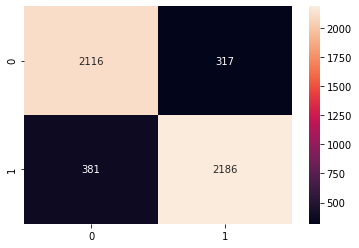

In [43]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot = True,fmt = 'd')

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
# test accuracy

In [46]:
acs = accuracy_score(y_test,y_predict)

In [47]:
acs

0.8604

In [48]:
# train accuracy

In [49]:
accuracy_score(y_train,gnb.predict(x_train))

0.8972857142857142

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2433
           1       0.87      0.85      0.86      2567

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



## Test Time

In [77]:
test = pd.read_csv("./Test/Test.csv")

In [78]:
test.shape

(10000, 1)

In [80]:
test.head()

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [82]:
test['cleaned_review'] = test['review'].apply(clean_text)

In [83]:
x_test = test['cleaned_review']

In [84]:
x_test = cv.transform(x_test)

In [86]:
x_test.shape

(10000, 50000)

In [87]:
x_test = tfidf.transform(x_test)

In [88]:
y_pred = gnb.predict(x_test)

In [ ]:
y_pred

# Support Vector Machine(SVM)

In [96]:
from sklearn.svm import SVC

In [97]:
model = SVC()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_predi = model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_predi)